In [6]:
import pandas as pd
import numpy as np
import imageio
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

# Restaurant Reservations

In [2]:
path = "data/uncover/OpenTable/"
df = pd.read_csv(path + 'restaurant-performance.csv')

In [3]:
df.head()

,region_type,region,state,country,percent_yoy_change,date
0,countries,Global,NaN,NaN,-1,2020-02-18
1,countries,Global,NaN,NaN,3,2020-02-19
2,countries,Global,NaN,NaN,-1,2020-02-20
3,countries,Global,NaN,NaN,-2,2020-02-21
4,countries,Global,NaN,NaN,1,2020-02-22


In [4]:
geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.geocode("Atlanta, Georgia")

In [5]:
#get posible combinations of city and state
#temp_df = df[['city', 'state']].groupby(by=['city','state']).count()
cities = df.city.unique().tolist()

lat = []
lon = []

for city in cities:
    # search location name to get lat and lon
    location = geolocator.geocode( city )
    lat.append(location.latitude)
    lon.append(location.longitude)

AttributeError: 'DataFrame' object has no attribute 'city'

In [ ]:
df_loc = pd.DataFrame(cities)
df_loc.columns = ['city']
df_loc['lat'] = lat
df_loc['lon'] = lon

df_loc.head()

In [ ]:
lat = []
lon = []
for i, row in df.iterrows():
    lat.append(df_loc[df_loc['city'] == row['city']]['lat'].values[0])
    lon.append(df_loc[df_loc['city'] == row['city']]['lon'].values[0])

In [ ]:
df['lat'] = lat
df['lon'] = lon
df['date'] = pd.to_datetime(df['date']).dt.date

In [ ]:
df.head()

In [ ]:
dates = df.date.unique()

In [ ]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[~world.name.isin(["Antarctica", "Fr. S. Antarctic Lands"])]

In [ ]:
def plot_map(df, i):
    fig, ax = plt.subplots(1, figsize=(20,10), facecolor='lightblue')

    # plot map
    world.plot(ax=ax, color='gray')
    
    myMap = df[df['date'] == i]
    # plot infected locations
    plt.scatter(x=myMap['lon'], y=myMap['lat'], s=200, c=myMap['percent_yoy_change'], 
                cmap='viridis', vmin=-100, vmax=20)
    
    plt.text(-60, 90, str(i)+'\nRestaurant Reservations YOY change', color = 'black', fontsize = 50, ha='center')
    
    ax.set_xlim(-170, 30)
    ax.set_ylim(0, 80)
    
    # set an axis for the color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)
    # color bar
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=-100, vmax=20))
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax)
    #cbar.ax.set_yticklabels(['-100%', '-75%', '-50%', '-25%', '0%', '25%', '50%', '75%', '100%'])
    cbar.ax.set_yticklabels(['-100%', '-80%', '-60%', '-40%', '-20%', '0%', '20%'])
    
    cbar.ax.tick_params(labelsize=18)
    
        
    plt.subplots_adjust(left=0, right=0.95, top=1, bottom=-0.2)
    # hide map axis
    ax.axis('off')
    
    plt.savefig('img/video/restaurant'+str(i)+'.png', facecolor='lightblue', edgecolor='none')
    plt.close()
    
#plot_map(df, dates[1])

In [ ]:
filenames = []
for date in dates:
    plot_map(df, date)
    filenames.append('img/video/restaurant'+str(date)+'.png')

In [ ]:

# build a .gif with the pictures
def build_gif(filenames, title, duration=1):
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))

    imageio.mimwrite((title + '.gif'), images, duration=duration)

In [ ]:
build_gif(filenames, 'restaurants', 0.5)

# Fiscal Impulse

In [7]:
title = "Discretionary 2020 fiscal measures adopted in response to coronavirus\nby 30 March 2020"

In [9]:
df = pd.read_csv('data/fiscal_impulse.csv')

df['Immediate fiscal impulse'] = [float(x[:-1]) for x in df['Immediate fiscal impulse'].values]
df['Deferral'] = [float(x[:-1]) for x in df['Deferral'].values]
df['Other liquidity/guarantee'] = [float(x[:-1]) for x in df['Other liquidity/guarantee'].values]

df['Total'] = df['Other liquidity/guarantee']+df['Deferral']+df['Immediate fiscal impulse']
df.sort_values('Total', inplace=True)
df.reset_index(inplace=True)

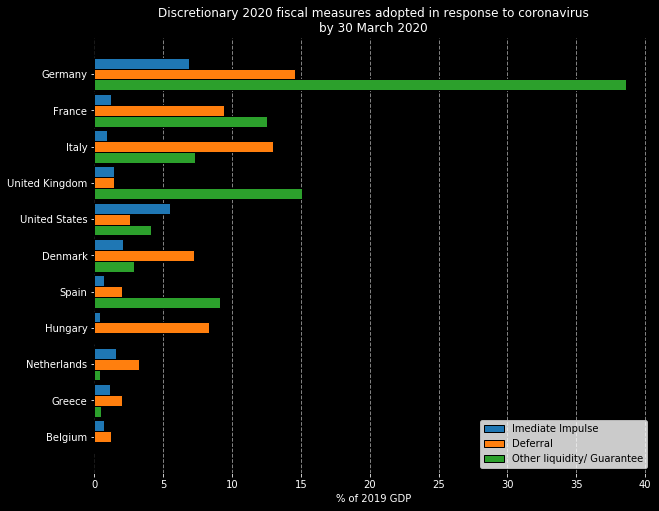

In [10]:
fig, ax = plt.subplots(1, figsize=(10,8), facecolor='black')

plt.barh(df.index+0.3, df['Immediate fiscal impulse'], height=0.3, edgecolor='black')
plt.barh(df.index, df['Deferral'], height=0.3, edgecolor='black')
plt.barh(df.index-0.3, df['Other liquidity/guarantee'], height=0.3, edgecolor='black')

plt.yticks(df.index, df['Country'])
plt.xlabel('% of 2019 GDP')
plt.title(title, color='white')

# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'x')
ax.set_axisbelow(True)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
    
#Colors
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

plt.legend(['Imediate Impulse', 'Deferral', 'Other liquidity/ Guarantee'])

plt.savefig('img/fiscal_measures.png', facecolor='black', edgecolor='none')